Filtering the dataset based on covid +ve and -ve

In [1]:
import pandas as pd
import os
import numpy as np

# datapath1='covid-chestxray-dataset-master'
# dataset_path='dataset'

# categories=os.listdir(dataset_path)
# print(categories)

# dataset=pd.read_csv(os.path.join(datapath1,'metadata.csv'))
# findings=dataset['finding']
# image_names=dataset['filename']

In [2]:
# positives_index=np.concatenate((np.where(findings=='Pneumonia/Viral/COVID-19')[0],np.where(findings=='Pneumonia/Viral/SARS')[0]))
# positive_image_names=image_names[positives_index]

In [3]:
# import cv2

# for positive_image_name in positive_image_names:
#     image=cv2.imread(os.path.join(datapath1,'images',positive_image_name))
#     try:
#         cv2.imwrite(os.path.join(dataset_path,categories[1],positive_image_name),image)
#     except Exception as e:
#         print(e)

In [4]:
# positive_image_names.shape

In [5]:
# datapath2='562468_1022626_bundle_archive'

# dataset=pd.read_csv(os.path.join(datapath2,'Chest_xray_Corona_Metadata.csv'))
# findings=dataset['Label']
# image_names=dataset['X_ray_image_name']

In [6]:
# negative_index=np.where(findings=='Normal')[0]

In [7]:
# negative_image_names=image_names[negative_index]

In [8]:
# for negative_image_name in negative_image_names:
#     image=cv2.imread(os.path.join(datapath2,'images',negative_image_name))
#     try:
#         cv2.imwrite(os.path.join(dataset_path,categories[0],negative_image_name),image)
#     except Exception as e:
#         print(e)


In [9]:
# negative_image_names.shape

# Pre-processing

In [12]:
import os
os.sys.path
import cv2 

data_path='./dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Covid19 Negative': 0, 'Covid19 Positive': 1}
['Covid19 Negative', 'Covid19 Positive']
[0, 1]


In [13]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_sr

In [16]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
!pip install tensorflow
from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 272.8/272.8 MB 4.6 MB/s eta 0:00:00
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
     ---------------------------------------- 4.2/4.2 MB 18.1 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached jax-0.4.13.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: f

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:
np.save('data',data)
np.save('target',new_target)

# training the CNN

In [18]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [24]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):
    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
model.add(conv_model)

#This is the first convolution of 64

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#This is the first convolution of 32
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the results
model.add(Flatten())
model.add(Dropout(0.5))

# 128 neuron hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# 64 neuron hidden layer
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

#2 output neuron. It will contain +ve and -ve
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 100, 100, 384)     11008     
                                                                 
 conv2d_18 (Conv2D)          (None, 98, 98, 64)        221248    
                                                                 
 activation_6 (Activation)   (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 32)        18464     
                                                                 
 activation_7 (Activation)   (None, 47, 47, 32)        0         
                                                      

In [25]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [26]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 0.6035 - accuracy: 0.7500

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


14/14 [==============================] - 73s 5s/step - loss: 0.6035 - accuracy: 0.7500 - val_loss: 0.5767 - val_accuracy: 0.7706
Epoch 2/5
14/14 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.8050

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


14/14 [==============================] - 69s 5s/step - loss: 0.5591 - accuracy: 0.8050 - val_loss: 0.5421 - val_accuracy: 0.7706
Epoch 3/5
14/14 [==============================] - ETA: 0s - loss: 0.5259 - accuracy: 0.8050

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


14/14 [==============================] - 67s 5s/step - loss: 0.5259 - accuracy: 0.8050 - val_loss: 0.5410 - val_accuracy: 0.7706
Epoch 4/5
14/14 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.8050

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


14/14 [==============================] - 60s 4s/step - loss: 0.5234 - accuracy: 0.8050 - val_loss: 0.5385 - val_accuracy: 0.7706
Epoch 5/5
14/14 [==============================] - 70s 5s/step - loss: 0.5204 - accuracy: 0.8050 - val_loss: 0.5393 - val_accuracy: 0.7706


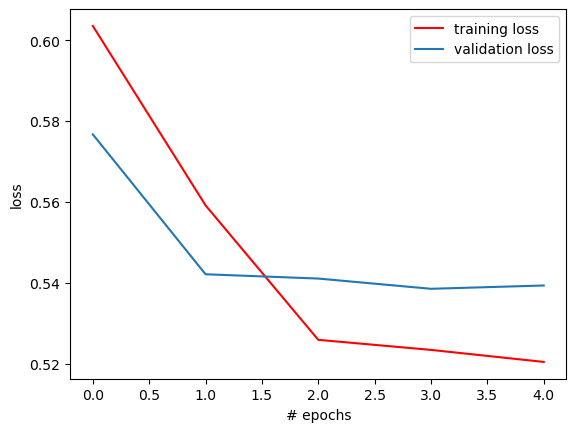

In [27]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()